In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

## Importing covid_19_data.csv 
- Controlled dataset to be used for year 2020 analysis and visualization|

In [2]:
df_covid = pd.read_csv("covid_19_data.csv")
df_covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [3]:
#Filtering out by singapore data and columns: Confirmed, Deaths and Recovered
df_covid_sg = df_covid[df_covid['Country/Region'] == 'Singapore'].loc[:,['ObservationDate','Confirmed','Deaths','Recovered']]

#Printing the filtered data set 
df_covid_sg

,ObservationDate,Confirmed,Deaths,Recovered
76,01/23/2020,1.0,0.0,0.0
122,01/24/2020,3.0,0.0,0.0
163,01/25/2020,3.0,0.0,0.0
209,01/26/2020,4.0,0.0,0.0
256,01/27/2020,5.0,0.0,0.0
...,...,...,...,...
113228,09/19/2020,57558.0,27.0,57142.0
113970,09/20/2020,57576.0,27.0,57181.0
114712,09/21/2020,57606.0,27.0,57241.0
115455,09/22/2020,57627.0,27.0,57262.0


In [4]:
#Finding month end aggregate data for CONFIRMED cases using for loops

month_range = [['22','31'], #jan
               ['01','29'], #feb
               ['01','31'], #mar
               ['01','30'], #apr
               ['01','31'], #may
               ['01','30'], #jun
               ['01','31'], #july
               ['01','31'], #aug
               ['01','23']] #sept
monthly_confirmed = []
for i, dates in enumerate(month_range):
    day_start  = f'0{i+1}/{dates[1]}/2020'
    day_end    = f'0{i+1}/{dates[0]}/2020'
    #print(day_start, day_end)
    month_end = df_covid_sg.loc[df_covid_sg['ObservationDate'] == f'0{i+1}/{dates[1]}/2020', 'Confirmed', ].sum()
    month_start = df_covid_sg.loc[df_covid_sg['ObservationDate'] == f'0{i+1}/{dates[0]}/2020', 'Confirmed'].sum()
    print(f'New cases in month {i+1}: {month_end - month_start}')
    monthly_confirmed.append(month_end)

monthly_confirmed

New cases in month 1: 13.0
New cases in month 2: 86.0
New cases in month 3: 820.0
New cases in month 4: 15169.0
New cases in month 5: 17783.0
New cases in month 6: 8615.0
New cases in month 7: 8083.0
New cases in month 8: 4300.0
New cases in month 9: 787.0


[13.0, 102.0, 926.0, 16169.0, 34884.0, 43907.0, 52205.0, 56812.0, 57639.0]

In [5]:
#Finding month end aggregate data for RECOVERED cases using for loops 

month_range = [['22','31'], #jan
               ['01','29'], #feb
               ['01','31'], #mar
               ['01','30'], #apr
               ['01','31'], #may
               ['01','30'], #jun
               ['01','31'], #jul
               ['01','31'], #aug
               ['01','23']] #sep
monthly_recov = []
for i, dates in enumerate(month_range):
    day_start  = f'0{i+1}/{dates[1]}/2020'
    day_end    = f'0{i+1}/{dates[0]}/2020'
    #print(day_start, day_end)
    month_end = df_covid_sg.loc[df_covid_sg['ObservationDate'] == f'0{i+1}/{dates[1]}/2020', 'Recovered'].sum()
    month_start = df_covid_sg.loc[df_covid_sg['ObservationDate'] == f'0{i+1}/{dates[0]}/2020', 'Recovered'].sum()
    print(f'New cases in month {i+1}: {month_end - month_start}')
    monthly_recov.append(month_end)

monthly_recov

New cases in month 1: 0.0
New cases in month 2: 72.0
New cases in month 3: 168.0
New cases in month 4: 999.0
New cases in month 5: 20431.0
New cases in month 6: 16034.0
New cases in month 7: 7480.0
New cases in month 8: 8918.0
New cases in month 9: 1542.0


[0.0, 72.0, 240.0, 1244.0, 21699.0, 38500.0, 46491.0, 55658.0, 57291.0]

In [6]:
#Creating a final COVID-19 SINGAPORE dataframe to be used later

Date = {'Date' : ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20']}
df_covid_fil = pd.DataFrame({'Date' : ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20'],
                             'COVID-19 Confirmed': monthly_confirmed, 
                             'COVID-19 Recovered': monthly_recov})

df_covid_fil = df_covid_fil.reindex()
df_covid_fil

,Date,COVID-19 Confirmed,COVID-19 Recovered
0,Jan20,13.0,0.0
1,Feb20,102.0,72.0
2,Mar20,926.0,240.0
3,Apr20,16169.0,1244.0
4,May20,34884.0,21699.0
5,Jun20,43907.0,38500.0
6,Jul20,52205.0,46491.0
7,Aug20,56812.0,55658.0
8,Sep20,57639.0,57291.0


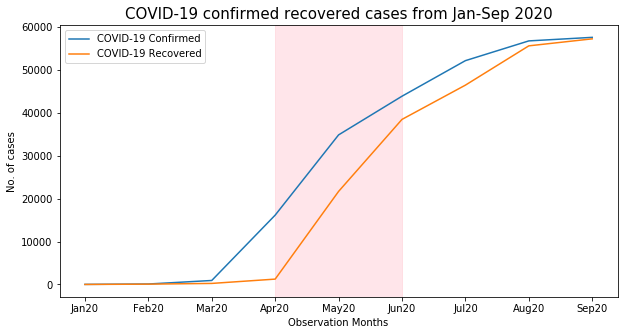

In [7]:
ax_covid = df_covid_fil.plot(figsize=(10,5),legend=True, fontsize=10) #plotting line graph
plt.ylabel('No. of cases') #set y-axis label
plt.xlabel('Observation Months') #set x-axis label 
plt.xticks(np.arange(9),('Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20')) #set x-axis names
plt.title('COVID-19 confirmed recovered cases from Jan-Sep 2020', fontsize=15) #set title
plt.axvspan(3, 5, color='pink', alpha=0.4) #highlights circuit breaker months in blue for visualisation
#plt.axvspan(0, 8, color='green', alpha=0.1) 
plt.show()

- Highlighted in red is in the months of COVID-19 period (Apr - June 2020)

## Importing Food & Beverage Svcs Index (FSI) in Chained Volume (mil)
- FSI measure the short term performance of F&B services industries based on sales records of F&B establishments respectively
-  It indicates that the higher the index, the higher the volume of sales

In [8]:
df_fsi = pd.read_csv('Food & Beverage Services Index, In Chained Volume Monthly.csv',
                    skipinitialspace=True)
df_fsi.head(10)

,Variables,1985 Jan,1985 Feb,1985 Mar,1985 Apr,1985 May,1985 Jun,1985 Jul,1985 Aug,1985 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,Total,74.682,75.819,76.388,66.721,70.417,75.06,65.583,67.384,70.417,...,107.090,107.190,82.664,78.194,46.216,48.106,56.576,76.169,76.239,71.958
1,Restaurants,93.485,98.704,90.648,77.828,82.594,88.946,73.404,75.559,85.089,...,111.235,111.193,73.723,63.743,26.876,30.556,39.892,65.587,69.005,65.711
2,Fast Food Outlets,25.772,28.303,30.364,26.006,27.037,31.629,26.287,27.973,26.99,...,119.670,121.896,107.451,111.125,78.331,81.257,90.296,101.018,107.249,97.596
3,Food Caterers,na,na,na,na,na,na,na,na,na,...,99.048,105.812,66.137,37.932,36.166,51.478,48.305,52.707,30.069,20.305
4,"Cafes, Food Courts & Other Eating Places *",87.27,80.653,93.57,84.328,88.529,90.525,87.059,88.529,84.644,...,102.204,100.412,87.877,91.456,57.058,54.139,64.352,84.333,85.146,82.585


In [9]:
df_fsi.columns
#showing column name

Index(['Variables ', '1985 Jan ', '1985 Feb ', '1985 Mar ', '1985 Apr ',
       '1985 May ', '1985 Jun ', '1985 Jul ', '1985 Aug ', '1985 Sep ',
       ...
       '2019 Dec ', '2020 Jan ', '2020 Feb ', '2020 Mar ', '2020 Apr ',
       '2020 May ', '2020 Jun ', '2020 Jul ', '2020 Aug ', '2020 Sep '],
      dtype='object', length=430)

In [10]:
#removing white spaces before words in columns 
df_fsi.columns = df_fsi.columns.str.strip()

#replacing remaining white spaces in Variable column to underscore
df_fsi.Variables = [col.replace(' ','_') for col in df_fsi.Variables]

In [11]:
df_fsi.head(5)

,Variables,1985 Jan,1985 Feb,1985 Mar,1985 Apr,1985 May,1985 Jun,1985 Jul,1985 Aug,1985 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,Total_,74.682,75.819,76.388,66.721,70.417,75.06,65.583,67.384,70.417,...,107.090,107.190,82.664,78.194,46.216,48.106,56.576,76.169,76.239,71.958
1,Restaurants_,93.485,98.704,90.648,77.828,82.594,88.946,73.404,75.559,85.089,...,111.235,111.193,73.723,63.743,26.876,30.556,39.892,65.587,69.005,65.711
2,Fast_Food_Outlets_,25.772,28.303,30.364,26.006,27.037,31.629,26.287,27.973,26.99,...,119.670,121.896,107.451,111.125,78.331,81.257,90.296,101.018,107.249,97.596
3,Food_Caterers_,na,na,na,na,na,na,na,na,na,...,99.048,105.812,66.137,37.932,36.166,51.478,48.305,52.707,30.069,20.305
4,"_____Cafes,_Food_Courts_&_Other_Eating_Places_*_",87.27,80.653,93.57,84.328,88.529,90.525,87.059,88.529,84.644,...,102.204,100.412,87.877,91.456,57.058,54.139,64.352,84.333,85.146,82.585


In [12]:
#Extracting Cafes,_Food_Courts_&_Other_Eating_Places data, then Transposing it

df_fsi = df_fsi[(df_fsi.Variables == '_____Cafes,_Food_Courts_&_Other_Eating_Places_*_')].T

#shows filtered data
df_fsi.head(5)

,4
Variables,"_____Cafes,_Food_Courts_&_Other_Eating_Places_*_"
1985 Jan,87.27
1985 Feb,80.653
1985 Mar,93.57
1985 Apr,84.328


In [13]:
#Cleaning of data
df_fsi = df_fsi.drop('Variables') #dropping unwanted row
df_fsi = df_fsi.reset_index() #resetting index to numeric for easy locating later

In [14]:
#renaming columns
df_fsi = df_fsi.rename(columns={'index':'Date', 4: 'Cafes & Food Courts/FSI'})

#filtering 10 year data until sep 2020
df_fsi_fil = df_fsi.iloc[300:429,:]
df_fsi_fil = df_fsi_fil.reset_index(drop=True)

In [15]:
#showing cleaned data set
df_fsi_fil.head(5)

,Date,Cafes & Food Courts/FSI
0,2010 Jan,91.847
1,2010 Feb,86.76
2,2010 Mar,95.833
3,2010 Apr,96.237
4,2010 May,98.346


In [16]:
df_fsi_fil.shape

(129, 2)

## Importing Value of F&B Sales (in Million of Dollars)
- Value of F&B sales refers to the total estimated sales (non-inflation adjusted) aggregate sales amount in million of dollars from all F&B operators 

In [17]:
df_fsiVal = pd.read_csv('Value Of Food & Beverage Sales Estimated, Monthly.csv',
                      skipinitialspace = True)

df_fsiVal.head()

,Variables,1997 Jan,1997 Feb,1997 Mar,1997 Apr,1997 May,1997 Jun,1997 Jul,1997 Aug,1997 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,Value Of Food & Beverage Sales - Estimated,288,284,306,279,294,299,288,289,299,...,958,965,731,681,401,425,498,671,670,629


In [18]:
#removing white spaces before words in columns 
df_fsiVal.columns = df_fsiVal.columns.str.strip()

#replacing remaining white spaces in Variable column to underscore
df_fsiVal.Variables = [col.replace(' ','_') for col in df_fsiVal.Variables]

#Transposing the df
df_fsiVal = df_fsiVal.T

df_fsiVal.head(10)

,0
Variables,Value_Of_Food_&_Beverage_Sales_-_Estimated_
1997 Jan,288
1997 Feb,284
1997 Mar,306
1997 Apr,279
1997 May,294
1997 Jun,299
1997 Jul,288
1997 Aug,289
1997 Sep,299


In [19]:
#Cleaning the transposed df

df_fsiVal = df_fsiVal.drop('Variables') #dropping unwanted row
df_fsiVal = df_fsiVal.reset_index() #resetting index to numeric for easy locating later

In [20]:
#renaming columns
df_fsiVal = df_fsiVal.rename(columns={'index':'Date', 0: 'Value of F&B Sales/$mil'})

#filtering 10 year data until sep 2020
df_fsiVal = df_fsiVal.iloc[156:285,:]
df_fsiVal = df_fsiVal.reset_index(drop=True)
df_fsiVal = df_fsiVal.iloc[:,1]

In [21]:
df_fsiVal.head(10)

0    525
1    529
2    528
3    525
4    565
5    544
6    561
7    557
8    557
9    586
Name: Value of F&B Sales/$mil, dtype: object

## Merging Data Sets 
- df_fsi_fil --> Cafes & Food Courts FSI (in volumes)
- df_fsiVal --> Value of F&B Sales ($ mil)

In [22]:
df_fsi_fsiVal = df_fsi_fil.merge(df_fsiVal, left_index=True, right_index=True)

df_fsi_fsiVal.head(10)

,Date,Cafes & Food Courts/FSI,Value of F&B Sales/$mil
0,2010 Jan,91.847,525
1,2010 Feb,86.76,529
2,2010 Mar,95.833,528
3,2010 Apr,96.237,525
4,2010 May,98.346,565
5,2010 Jun,98.635,544
6,2010 Jul,99.818,561
7,2010 Aug,96.155,557
8,2010 Sep,97.575,557
9,2010 Oct,100.399,586


## Importing Consumer Price Index (CPI) for Restaurant & Fast Food
- CPI mesures the average price changes in a fixed basket of consumption goods and services commonly purchased by the resident households over time.
- Extracting Food Servicing Services which includes a basket of Food Courts, Fast Food, Restaurant and Cafe Food Prices.

In [23]:
df_cpi = pd.read_excel('cpisep2020.xlsx', sheet_name='T5', skipinitialspace=True)
df_cpi

,Variables,1961 Jan,1961 Feb,1961 Mar,1961 Apr,1961 May,1961 Jun,1961 Jul,1961 Aug,1961 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,All Items,24.253,24.249,24.543,24.365,24.246,24.326,24.413,24.551,24.455,...,100.279,100.346,100.210,99.767,99.561,99.315,99.335,99.47,99.642,99.973
1,Food,21.412,21.314,21.743,21.432,21.253,21.383,21.515,21.723,21.549,...,100.767,100.295,101.536,101.210,101.784,101.984,102.202,102.11,102.13,102.149
2,Food Excl Food Servicing Services,na,na,na,na,na,na,na,na,na,...,100.787,99.798,102.326,101.363,103.143,103.716,104.193,103.787,103.589,103.483
3,Bread & Cereals,na,na,na,na,na,na,na,na,na,...,100.817,100.338,101.470,101.405,102.133,102.918,102.95,102.659,102.049,101.994
4,Meat,na,na,na,na,na,na,na,na,na,...,100.666,101.532,103.546,104.367,106.834,108.403,107.901,107.1,106.422,106.079
5,Fish & Seafood,na,na,na,na,na,na,na,na,na,...,101.418,99.058,102.508,100.099,101.551,99.969,99.859,99.874,101.383,102.353
6,"Milk, Cheese & Eggs",na,na,na,na,na,na,na,na,na,...,99.791,99.955,99.808,99.642,103.582,103.415,103.198,102.669,102.559,102.358
7,Oils & Fats,na,na,na,na,na,na,na,na,na,...,100.424,98.220,100.291,99.403,106.059,108.03,108.382,101.024,100.358,98.651
8,Fruits,na,na,na,na,na,na,na,na,na,...,100.546,101.743,101.483,100.903,99.984,101.118,102.561,103.071,101.041,102.851
9,Vegetables,`,na,na,na,na,na,na,na,na,...,101.549,102.420,103.391,102.640,104.763,105.341,106.036,105.746,105.097,105.122


In [24]:
#removing white spaces before words 
df_cpi['Variables'] = df_cpi['Variables'].str.strip()

#replacing remaining white spaces in Variable column to underscore
df_cpi.Variables = [col.replace(' ','_') for col in df_cpi.Variables]

df_cpi.head(5)

,Variables,1961 Jan,1961 Feb,1961 Mar,1961 Apr,1961 May,1961 Jun,1961 Jul,1961 Aug,1961 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,All_Items,24.253,24.249,24.543,24.365,24.246,24.326,24.413,24.551,24.455,...,100.279,100.346,100.210,99.767,99.561,99.315,99.335,99.47,99.642,99.973
1,Food,21.412,21.314,21.743,21.432,21.253,21.383,21.515,21.723,21.549,...,100.767,100.295,101.536,101.210,101.784,101.984,102.202,102.11,102.13,102.149
2,Food_Excl_Food_Servicing_Services,na,na,na,na,na,na,na,na,na,...,100.787,99.798,102.326,101.363,103.143,103.716,104.193,103.787,103.589,103.483
3,Bread_&_Cereals,na,na,na,na,na,na,na,na,na,...,100.817,100.338,101.470,101.405,102.133,102.918,102.95,102.659,102.049,101.994
4,Meat,na,na,na,na,na,na,na,na,na,...,100.666,101.532,103.546,104.367,106.834,108.403,107.901,107.1,106.422,106.079


In [25]:
df_cpi.Variables

#filtering only:: Food Servicing Services, which includes:
#Restaurant Food
#Fast Food
#Hawker Food
#Catered Food

0                                             All_Items
1                                                  Food
2                     Food_Excl_Food_Servicing_Services
3                                       Bread_&_Cereals
4                                                  Meat
5                                        Fish_&_Seafood
6                                   Milk,_Cheese_&_Eggs
7                                           Oils_&_Fats
8                                                Fruits
9                                            Vegetables
10                     Sugar,_Preserves_&_Confectionery
11                              Non-alcoholic_Beverages
12                                           Other_Food
13                              Food_Servicing_Services
14                                      Restaurant_Food
15                                            Fast_Food
16                                          Hawker_Food
17                                         Cater

In [26]:
cpi1 = df_cpi[(df_cpi.Variables == 'Food_Servicing_Services')]

#Transposing new filtered CPI data 
df_cpi = cpi1.T

df_cpi.head(10)

,13
Variables,Food_Servicing_Services
1961 Jan,na
1961 Feb,na
1961 Mar,na
1961 Apr,na
1961 May,na
1961 Jun,na
1961 Jul,na
1961 Aug,na
1961 Sep,na


In [27]:
df_cpi = df_cpi.drop('Variables') #dropping unwanted row
df_cpi = df_cpi.reset_index() #resetting index to numeric for easy locating later

#renaming columns
df_cpi_fil = df_cpi.rename(columns={'index':'Date',13: 'Food Servicing Services/CPI'})

In [28]:
df_cpi_fil

,Date,Food Servicing Services/CPI
0,1961 Jan,na
1,1961 Feb,na
2,1961 Mar,na
3,1961 Apr,na
4,1961 May,na
...,...,...
712,2020 May,101.252
713,2020 Jun,101.305
714,2020 Jul,101.373
715,2020 Aug,101.429


In [29]:
df_cpi_fil = df_cpi_fil.iloc[588:717,1:4]
df_cpi_fil = df_cpi_fil.reset_index(drop=True)

In [30]:
df_cpi_fil.head(10)

,Food Servicing Services/CPI
0,82.619
1,82.669
2,82.789
3,82.863
4,82.875
5,82.914
6,83.09
7,83.108
8,83.209
9,83.332


## Import Retail Sales Index (RSI), At Current Prices, Monthly.csv
- Filtering: Food & Alcohol dataset and supermarket & hypermarket


In [31]:
df_rsi = pd.read_csv('Retail Sales Index, At Current Prices, Monthly.csv')
df_rsi.head()

,Variables,1985 Jan,1985 Feb,1985 Mar,1985 Apr,1985 May,1985 Jun,1985 Jul,1985 Aug,1985 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,Total,32.675,31.984,27.277,22.345,23.468,21.439,21.651,22.672,21.679,...,108.370,103.918,79.309,85.494,55.268,47.158,66.471,86.594,88.953,82.379
1,Department Stores,na,na,na,na,na,na,na,na,na,...,124.847,110.827,59.143,57.002,14.859,7.850,28.207,58.527,63.904,56.208
2,Supermarkets & Hypermarkets,na,na,na,na,na,na,na,na,na,...,103.914,127.737,111.035,133.288,164.576,156.619,134.720,126.556,126.079,113.868
3,Mini-marts & Convenience Stores,48.778,66.383,46.06,46.588,47.091,42.318,46.671,50.355,47.725,...,98.778,114.155,94.565,105.965,114.578,111.863,104.570,104.314,104.259,98.239
4,Food & Alcohol *,na,na,na,na,na,na,na,na,na,...,107.752,145.067,65.446,58.615,41.157,38.630,48.654,55.093,62.643,56.548


In [32]:
#removing white spaces before words in columns 
df_rsi.columns = df_rsi.columns.str.strip()

#replacing remaining white spaces in Variable column to underscore
df_rsi.Variables = [col.replace(' ','_') for col in df_rsi.Variables]

df_rsi.head(10)

,Variables,1985 Jan,1985 Feb,1985 Mar,1985 Apr,1985 May,1985 Jun,1985 Jul,1985 Aug,1985 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,_Total_,32.675,31.984,27.277,22.345,23.468,21.439,21.651,22.672,21.679,...,108.370,103.918,79.309,85.494,55.268,47.158,66.471,86.594,88.953,82.379
1,_____Department_Stores_,na,na,na,na,na,na,na,na,na,...,124.847,110.827,59.143,57.002,14.859,7.850,28.207,58.527,63.904,56.208
2,_____Supermarkets_&_Hypermarkets_,na,na,na,na,na,na,na,na,na,...,103.914,127.737,111.035,133.288,164.576,156.619,134.720,126.556,126.079,113.868
3,_____Mini-marts_&_Convenience_Stores_,48.778,66.383,46.06,46.588,47.091,42.318,46.671,50.355,47.725,...,98.778,114.155,94.565,105.965,114.578,111.863,104.570,104.314,104.259,98.239
4,_____Food_&_Alcohol_*_,na,na,na,na,na,na,na,na,na,...,107.752,145.067,65.446,58.615,41.157,38.630,48.654,55.093,62.643,56.548
5,_____Motor_Vehicles_,14.27,12.96,8.557,6.318,6.327,4.746,5.244,5.349,5.283,...,68.053,70.495,66.095,75.153,20.493,13.183,41.064,74.521,78.246,75.104
6,_____Petrol_Service_Stations_,49.195,44.781,49.177,52.588,53.957,48.875,51.169,52.588,45.269,...,102.811,108.585,96.726,95.749,53.655,47.031,67.505,83.247,88.890,89.005
7,"_____Cosmetics,_Toiletries_&_Medical_Goods_",na,na,na,na,na,na,na,na,na,...,130.733,117.472,84.831,84.950,52.691,52.528,70.048,73.708,75.978,72.944
8,_____Wearing_Apparel_&_Footwear_,na,na,na,na,na,na,na,na,na,...,142.739,137.239,61.787,57.116,14.197,11.314,39.308,71.835,73.757,66.291
9,_____Furniture_&_Household_Equipment_,68.417,55.4,55.248,53.349,60.508,50.684,45.638,41.52,43.338,...,110.261,93.691,75.816,99.241,56.744,38.196,74.548,103.521,105.394,96.287


In [33]:
#filtering only Food & Alcohol and Supermarket Data
rsi1 = df_rsi[(df_rsi.Variables == '_____Supermarkets_&_Hypermarkets_')]
rsi2 = df_rsi[(df_rsi.Variables == '_____Food_&_Alcohol_*_')]

#merging then Transposing it
df_rsi = pd.concat([rsi1, rsi2]).T

#df_rsi.head()

In [34]:
#Cleaning of transposed dataset
df_rsi = df_rsi.drop('Variables') #dropping unwanted row
df_rsi = df_rsi.reset_index() #resetting index to numeric for easy locating later

In [35]:
#renaming columns
df_rsi = df_rsi.rename(columns={'index':'Date',
                                   2 : 'Supermarkets/RSI',
                                   4 : 'Food&Alcohol/RSI'})

#df_rsi.head(10)

In [36]:
#filtering 2010-present data
df_rsi = df_rsi.iloc[300:429,1:3]
df_rsi_fil = df_rsi.reset_index(drop=True)

df_rsi_fil

,Supermarkets/RSI,Food&Alcohol/RSI
0,81.587,96.059
1,81.439,140.235
2,75.561,82.871
3,74.299,85.464
4,80.317,92.041
...,...,...
124,156.619,38.63
125,134.72,48.654
126,126.556,55.093
127,126.079,62.643


## Merging Data Sets 
- df_fsi_fil --> Cafes & Food Courts FSI (in volumes)
- df_fsiVal --> Value of F&B Sales ($ mil) 
- ---> df_fsi_fsiVal

- df_rsi_fil
- df_cpi_fil
- df_covid_fil

In [37]:
merged_df1 = df_fsi_fsiVal.merge(df_cpi_fil, left_index=True, right_index=True)
merged_df2 = merged_df1.merge(df_rsi_fil, left_index=True, right_index=True)

In [38]:
df_covid_fil.shape

(9, 3)

In [39]:
#Further cleaning covid-df df for merging

df_covid_fil_1 = df_covid_fil.loc[:,['COVID-19 Confirmed']]
df_covid_fil_1

,COVID-19 Confirmed
0,13.0
1,102.0
2,926.0
3,16169.0
4,34884.0
5,43907.0
6,52205.0
7,56812.0
8,57639.0


In [40]:
#Creating a new data frame to make it (129, ) shape
x = pd.DataFrame({'COVID-19 Confirmed':[0 for x in range(0,120)]})
merged_df3 = pd.concat([x,df_covid_fil_1])

#resetting index for merger
merged_df3 = merged_df3.reset_index(drop=True)

merged_df3

,COVID-19 Confirmed
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
124,34884.0
125,43907.0
126,52205.0
127,56812.0


In [41]:
#Final merging of all dfs

final_merged_df = merged_df2.merge(merged_df3, left_index=True, right_index=True)
final_merged_df

,Date,Cafes & Food Courts/FSI,Value of F&B Sales/$mil,Food Servicing Services/CPI,Supermarkets/RSI,Food&Alcohol/RSI,COVID-19 Confirmed
0,2010 Jan,91.847,525,82.619,81.587,96.059,0.0
1,2010 Feb,86.76,529,82.669,81.439,140.235,0.0
2,2010 Mar,95.833,528,82.789,75.561,82.871,0.0
3,2010 Apr,96.237,525,82.863,74.299,85.464,0.0
4,2010 May,98.346,565,82.875,80.317,92.041,0.0
...,...,...,...,...,...,...,...
124,2020 May,54.139,425,101.252,156.619,38.63,34884.0
125,2020 Jun,64.352,498,101.305,134.72,48.654,43907.0
126,2020 Jul,84.333,671,101.373,126.556,55.093,52205.0
127,2020 Aug,85.146,670,101.429,126.079,62.643,56812.0


## Exporting of merged DF into csv file

In [42]:
final_merged_df.to_csv('final_merged_df_file.csv', index = False, header=True)

#exporting final df into file called final_merged_df_file.csv

## Checking of data prior to analysis

In [43]:
final_merged_df = pd.read_csv("final_merged_df_file.csv")

final_merged_df.isnull().values.all(axis=0)
#check for null values in all columns

array([False, False, False, False, False, False, False])

## Multiple Regression Model Without COVID-19
- Finding out strongest correlation with Food Servicing Services CPI 
- Finding the r-squared value. R-square is an indicator of the compactness of the regression line.
### The goal here is to reduce error by removing the least correlated variable vs FSS CPI (dependent variable).


In [92]:
X = final_merged_df.drop(["Food Servicing Services/CPI", "Date", 'COVID-19 Confirmed'], axis = 1)
# Remove target Cafes & Food Courts/FSI and COVID-19 (y component) from x component.

y = final_merged_df.iloc[:,3] 
# Cafes & Food Courts/FSI

# Split data into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
len(X_train)

116

In [93]:
#final_merged_df.drop(["Cafes & Food Courts/FSI", "Date", 'COVID-19 Confirmed'], axis = 1) 

In [94]:
# Fitting Multiple Linear Regression to the Training set
lm = LinearRegression()
lm
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# Predict the Test set results
y_pred = lm.predict(X_test)
y_pred

array([ 89.97159898,  85.18162552,  99.92562367,  90.95995354,
        82.26188841, 100.56186728,  89.84704222,  97.30816889,
        97.55142711,  83.17431578,  93.67762887,  83.46808039,
        96.23646545])

In [96]:
# Calculating the Coefficients
coef = lm.coef_

for cf in zip(X.columns, coef):
    print("Initially, the coefficient for {} is {:.4f}.".format(cf[0], cf[1]))

Initially, the coefficient for Cafes & Food Courts/FSI is -0.2303.
Initially, the coefficient for Value of F&B Sales/$mil is 0.0425.
Initially, the coefficient for Supermarkets/RSI is 0.1393.
Initially, the coefficient for Food&Alcohol/RSI is -0.0992.


In [97]:
# Calculating the Intercept
intercept = lm.intercept_

print("Initially, the intercept for our model is {:.4f}".format(intercept))

Initially, the intercept for our model is 79.9115


In [98]:
# Calculating the R squared value
r2_score(y_test, y_pred)

0.9645919804457465

## Correlation with Cafes & Food Court FSI Index
- Value of F&B Sales/$mil	
- Food Servicing/CPI

In [51]:
final_merged_df.iloc[:,1:6].corr(method = "pearson")

,Cafes & Food Courts/FSI,Value of F&B Sales/$mil,Food Servicing Services/CPI,Supermarkets/RSI,Food&Alcohol/RSI
Cafes & Food Courts/FSI,1.000000,0.479874,-0.284500,-0.601670,0.476871
Value of F&B Sales/$mil,0.479874,1.000000,0.609993,0.133604,0.362732
Food Servicing Services/CPI,-0.284500,0.609993,1.000000,0.710098,-0.263081
Supermarkets/RSI,-0.601670,0.133604,0.710098,1.000000,-0.169124
Food&Alcohol/RSI,0.476871,0.362732,-0.263081,-0.169124,1.000000


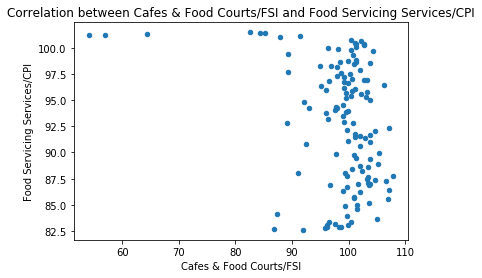

In [52]:
final_merged_df.plot("Cafes & Food Courts/FSI", "Food Servicing Services/CPI", kind = "scatter")
plt.xlabel("Cafes & Food Courts/FSI")# x-axis label
plt.ylabel("Food Servicing Services/CPI")  # y-axis label
plt.title("Correlation between Cafes & Food Courts/FSI and Food Servicing Services/CPI") #Graph title
plt.show()

#-0.2845 weak

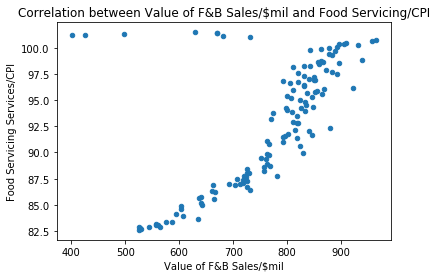

In [53]:
final_merged_df.plot("Value of F&B Sales/$mil","Food Servicing Services/CPI", kind = "scatter")
plt.xlabel("Value of F&B Sales/$mil") #x-axis label
plt.ylabel("Food Servicing Services/CPI")  #y-axis label
plt.title("Correlation between Value of F&B Sales/$mil and Food Servicing/CPI") #Graph title
plt.show()

#0.609993 moderate

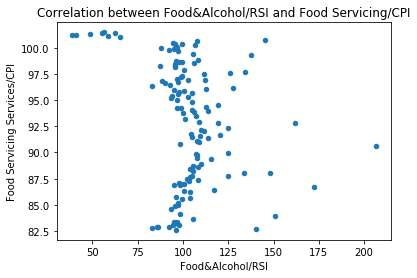

In [54]:
final_merged_df.plot("Food&Alcohol/RSI","Food Servicing Services/CPI", kind = "scatter")
plt.xlabel("Food&Alcohol/RSI") #x-axis label
plt.ylabel("Food Servicing Services/CPI")  #y-axis label
plt.title("Correlation between Food&Alcohol/RSI and Food Servicing/CPI") #Graph title
plt.show()

#-0.263081 weak

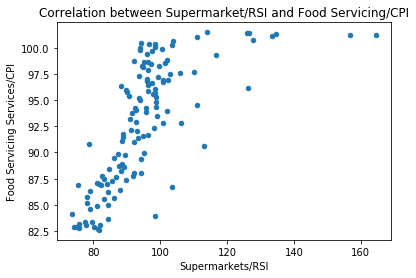

In [55]:
final_merged_df.plot("Supermarkets/RSI","Food Servicing Services/CPI", kind = "scatter")
plt.xlabel("Supermarkets/RSI") #x-axis label
plt.ylabel("Food Servicing Services/CPI")  #y-axis label
plt.title("Correlation between Supermarket/RSI and Food Servicing/CPI") #Graph title
plt.show()

#0.710098 Strong

## Revised Multiple Regression Model
- From the analaysis above, it is found out thta Food Servicing Services CPI or the prices of Food Courts, Cafe, Restaurant and Hawker Foods are highly correlated with Value of sales from F&B outlets and Supermarkets/RSI Index.

In [56]:
final_merged_df

,Date,Cafes & Food Courts/FSI,Value of F&B Sales/$mil,Food Servicing Services/CPI,Supermarkets/RSI,Food&Alcohol/RSI,COVID-19 Confirmed
0,2010 Jan,91.847,525,82.619,81.587,96.059,0.0
1,2010 Feb,86.760,529,82.669,81.439,140.235,0.0
2,2010 Mar,95.833,528,82.789,75.561,82.871,0.0
3,2010 Apr,96.237,525,82.863,74.299,85.464,0.0
4,2010 May,98.346,565,82.875,80.317,92.041,0.0
...,...,...,...,...,...,...,...
124,2020 May,54.139,425,101.252,156.619,38.630,34884.0
125,2020 Jun,64.352,498,101.305,134.720,48.654,43907.0
126,2020 Jul,84.333,671,101.373,126.556,55.093,52205.0
127,2020 Aug,85.146,670,101.429,126.079,62.643,56812.0


In [100]:
X_rev = final_merged_df.drop(["Food Servicing Services/CPI",
                              "Date",'COVID-19 Confirmed',
                              'Cafes & Food Courts/FSI',
                              'Food&Alcohol/RSI'], axis = 1)
# Remove target Cafes & Food Courts/FSI, COVID-19, Food & Acohol FSI (y component) from x component.

y_rev = final_merged_df.iloc[:,3] 
# Food Servicing Services/CPI

# Split data into training and testing portion
X_rev_train, X_rev_test, y_rev_train, y_rev_test = train_test_split(X_rev, y_rev, test_size = 0.1, random_state = 0)
len(X_rev_train)

116

In [101]:
# Fitting New Multiple Linear Regression to the Training set
lm = LinearRegression()
lm
lm.fit(X_rev_train, y_rev_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# Predict the New Test set results
y_rev_pred = lm.predict(X_rev_test)
y_rev_pred

array([ 91.044292  ,  94.01637513,  99.14321502,  91.03684963,
        82.39288148, 100.55242059,  90.13695653,  95.27767941,
        95.593205  ,  84.02402349,  95.68632273,  83.31365043,
        96.4890433 ])

In [103]:
# Calculating the Coefficients
coef = lm.coef_

for cf in zip(X_rev.columns, coef):
    print("After revising the model, the coefficient for {} is {:.4f}.".format(cf[0], cf[1]))

After revising the model, the coefficient for Value of F&B Sales/$mil is 0.0260.
After revising the model, the coefficient for Supermarkets/RSI is 0.2594.


In [104]:
# Calculating the Intercept
intercept = lm.intercept_

print("After revising the model, the intercept for our model is {:.4f}".format(intercept))

After revising the model, the intercept for our model is 48.3088


In [105]:
# Calculating the new R squared value
r2_score(y_rev_test, y_rev_pred)

0.8284505485646371

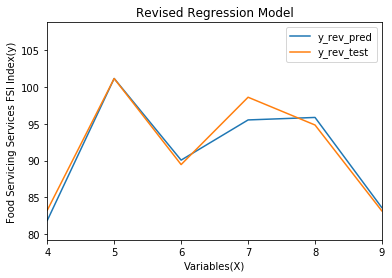

In [63]:
plt.plot(y_rev_pred)
plt.plot(list(y_rev_test))

plt.xlabel("Variables(X)")# x-axis label
plt.ylabel("Food Servicing Services FSI Index(y)")  # y-axis label
plt.title("Revised Regression Model") # Graph title
plt.legend(["y_rev_pred", "y_rev_test"])
plt.xlim(left=4, right=9)
plt.show()

## Testing Regression Model With COVID-19 Data for 2020

In [64]:
covid_final_merged_df = final_merged_df.loc[120:129,]
covid_final_merged_df

,Date,Cafes & Food Courts/FSI,Value of F&B Sales/$mil,Food Servicing Services/CPI,Supermarkets/RSI,Food&Alcohol/RSI,COVID-19 Confirmed
120,2020 Jan,100.412,965,100.761,127.737,145.067,13.0
121,2020 Feb,87.877,731,101.057,111.035,65.446,102.0
122,2020 Mar,91.456,681,101.159,133.288,58.615,926.0
123,2020 Apr,57.058,401,101.238,164.576,41.157,16169.0
124,2020 May,54.139,425,101.252,156.619,38.630,34884.0
125,2020 Jun,64.352,498,101.305,134.720,48.654,43907.0
126,2020 Jul,84.333,671,101.373,126.556,55.093,52205.0
127,2020 Aug,85.146,670,101.429,126.079,62.643,56812.0
128,2020 Sep,82.585,629,101.465,113.868,56.548,57639.0


In [65]:
X_covid = final_merged_df.drop(["Food Servicing Services/CPI",
                              'Cafes & Food Courts/FSI',
                              'Food&Alcohol/RSI', 'Date'], axis = 1)
# Remove target Cafes & Food Courts/F`SI, Food & Acohol FSI (y component) from x component, then filtering only 2020 data

y_covid = final_merged_df.iloc[:,3]
# Food Servicing Services/CPI

# Split data into training and testing portion
X_covid_train, X_covid_test, y_covid_train, y_covid_test = train_test_split(X_covid, y_covid, test_size = 0.2, random_state = 20)
len(X_covid_train)

103

In [66]:
# Fitting New Multiple Linear Regression to the Training set
lm = LinearRegression()
lm
lm.fit(X_covid_train, y_covid_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# Predict the New Test set results
y_covid_pred = lm.predict(X_covid_test)
y_covid_pred

array([ 95.89577172,  81.93736955,  94.11179994,  92.55947904,
        96.35440065,  95.55063346,  96.81405923,  90.97293383,
       100.65860234,  93.11066   ,  97.99253655,  89.17646094,
        81.27340667,  96.17095095,  82.04072549,  80.85468699,
        97.55381469,  89.37924054,  95.55177077,  95.5038212 ,
        97.79118259,  92.48500702,  90.32093254,  98.182014  ,
        98.09783519,  90.81322872])

In [68]:
# Calculating the Coefficients
coef = lm.coef_

for cf in zip(X_covid.columns, coef):
    print("After revising the model with COVID Data, the coefficient for {} is {:.4f}.".format(cf[0], cf[1]))

After revising the model with COVID Data, the coefficient for Value of F&B Sales/$mil is 0.0331.
After revising the model with COVID Data, the coefficient for Supermarkets/RSI is 0.1961.
After revising the model with COVID Data, the coefficient for COVID-19 Confirmed is 0.0001.


In [69]:
r2_score(y_covid_test, y_covid_pred)

#r2 is not calculated due to the lack of sample points, we will use correlation for 2020 data to analyse more insights

0.8234797628669045

## Testing Correlation Betweeen COVID-19 and variables in 2020 Jan - 2020 Sep

In [70]:
covid_final_merged_df.drop(['Cafes & Food Courts/FSI','Food&Alcohol/RSI'], axis=1).corr(method='pearson')

,Value of F&B Sales/$mil,Food Servicing Services/CPI,Supermarkets/RSI,COVID-19 Confirmed
Value of F&B Sales/$mil,1.000000,-0.601596,-0.681988,-0.353224
Food Servicing Services/CPI,-0.601596,1.000000,0.011217,0.858991
Supermarkets/RSI,-0.681988,0.011217,1.000000,-0.098604
COVID-19 Confirmed,-0.353224,0.858991,-0.098604,1.000000


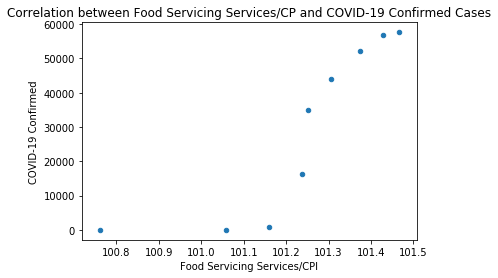

In [71]:
covid_final_merged_df.plot("Food Servicing Services/CPI", "COVID-19 Confirmed", kind = "scatter")
plt.xlabel("Food Servicing Services/CPI")# x-axis label
plt.ylabel("COVID-19 Confirmed")  # y-axis label
plt.title("Correlation between Food Servicing Services/CP and COVID-19 Confirmed Cases") # Graph title
plt.show()

#strong

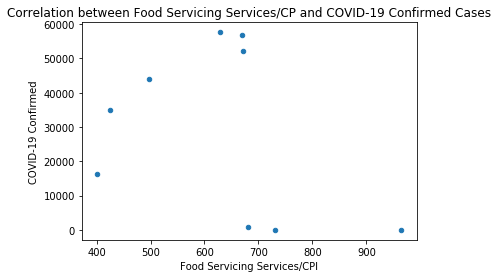

In [72]:
covid_final_merged_df.plot("Value of F&B Sales/$mil", "COVID-19 Confirmed", kind = "scatter")
plt.xlabel("Food Servicing Services/CPI")# x-axis label
plt.ylabel("COVID-19 Confirmed")  # y-axis label
plt.title("Correlation between Food Servicing Services/CP and COVID-19 Confirmed Cases") # Graph title
plt.show()

#weak

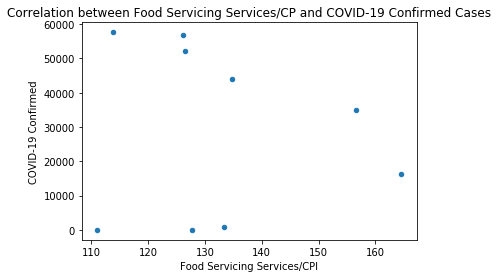

In [73]:
covid_final_merged_df.plot("Supermarkets/RSI", "COVID-19 Confirmed", kind = "scatter")
plt.xlabel("Food Servicing Services/CPI")# x-axis label
plt.ylabel("COVID-19 Confirmed")  # y-axis label
plt.title("Correlation between Food Servicing Services/CP and COVID-19 Confirmed Cases") # Graph title
plt.show()

#weak

- Despite having a good fit from the regression model, the introduction of a confounding factor variable - COVID-19 (confirmed cases) has affected the correlation between the two independent variable, and it has became weaker. This suggested that COVID-19 has a direct positive influence on FSS CPI.

- Interestingly, since COVID-19 infections (via confirmed cases) does not really affect the Value of F&B sales and Supermarket sales volume (RSI), determinants of price changes of F&B services are not really affected by these independent variables during the COVID-19 period.

- It is expected that the value of sales of F&B services will fall due to covid but it didn't, we will anlayse more on it below

## Further analysis of COVID-19 on dependent variable (Food Servicing Services/CPI Index)

In [74]:
df_covid_fil['Active Cases'] = df_covid_fil['COVID-19 Confirmed'] - df_covid_fil['COVID-19 Recovered']

covid_test_df = df_covid_fil.merge(final_merged_df.drop(["Value of F&B Sales/$mil",
                                                         'Cafes & Food Courts/FSI',
                                                         'Food&Alcohol/RSI',
                                                         'Supermarkets/RSI',
                                                         'Date'], axis = 1), left_index=True, right_index=True)

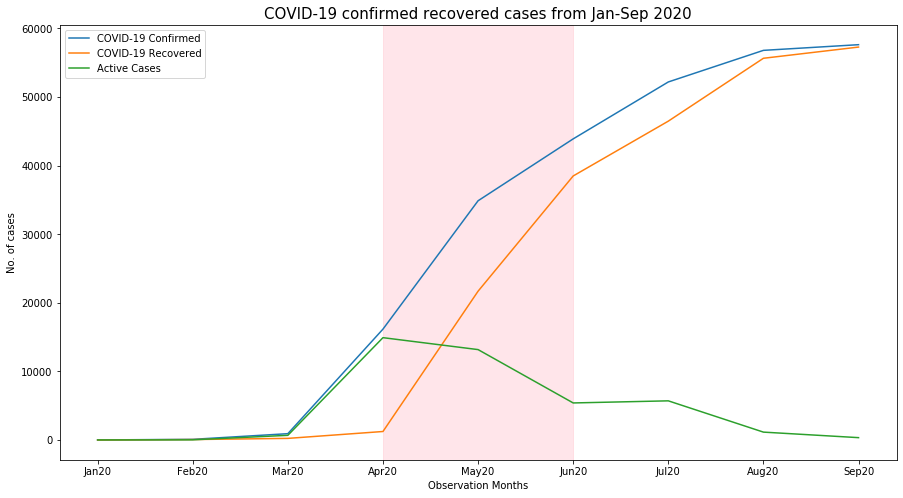

In [75]:
ax_covid_active = df_covid_fil.plot(figsize=(15,8),legend=True, fontsize=10) #plotting line graph
plt.ylabel('No. of cases') #set y-axis label
plt.xlabel('Observation Months') #set x-axis label 
plt.xticks(np.arange(9),('Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20')) #set x-axis names
plt.title('COVID-19 confirmed recovered cases from Jan-Sep 2020', fontsize=15) #set title
plt.axvspan(3, 5, color='pink', alpha=0.4) #highlights circuit breaker months in blue for visualisation
#plt.axvspan(0, 8, color='green', alpha=0.1) 
plt.show()


#highlited in red is during the months of Circuit Breaker Period

## Analysing if Number Of Recovered Cases Play a part in affecting Food Servicing Services CPI

In [76]:
covid_test_df.drop(covid_test_df['COVID-19 Confirmed_y']).corr(method='pearson')

,COVID-19 Confirmed_x,COVID-19 Recovered,Active Cases,Food Servicing Services/CPI,COVID-19 Confirmed_y
COVID-19 Confirmed_x,1.000000,0.971595,-0.037613,0.921168,NaN
COVID-19 Recovered,0.971595,1.000000,-0.273027,0.921392,NaN
Active Cases,-0.037613,-0.273027,1.000000,-0.146081,NaN
Food Servicing Services/CPI,0.921168,0.921392,-0.146081,1.000000,NaN
COVID-19 Confirmed_y,NaN,NaN,NaN,NaN,NaN


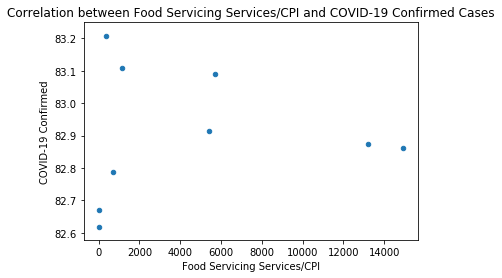

In [77]:
covid_test_df.plot("Active Cases","Food Servicing Services/CPI", kind = "scatter")
plt.xlabel("Food Servicing Services/CPI")# x-axis label
plt.ylabel("COVID-19 Confirmed")  # y-axis label
plt.title("Correlation between Food Servicing Services/CPI and COVID-19 Confirmed Cases") # Graph title
plt.show()
#strong 0.920678

- strong correlation between FSS CPI and COVID-19 Confirmed Cases
- implies that theres a strong positive relationship, prices in F&B Services are increasing as covid-19 infections increases

# Further analysis on Online sales order &  COVID-19|
### - Finding out what the weak correlation between covid-19 and value of sales from F&B Services

## Importing Online Sales From F&B Services (in mil$)

In [78]:
df_online_sales = pd.read_csv('Online Food & Beverage Sales Proportion.csv')

df_online_sales.head()

,Variables,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,...,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep
0,Food & Beverage Services,7.3,7.4,8.1,8.2,8.1,8.7,8.9,9.4,9.4,...,10.2,9.8,12.5,15.6,39.2,44.6,32.7,21.1,20.6,20.4


In [79]:
#removing white spaces before words in columns 
df_online_sales.columns = df_online_sales.columns.str.strip()

#replacing remaining white spaces in Variable column to underscore
df_online_sales.Variables = [col.replace(' ','_') for col in df_online_sales.Variables]

#Transposing the df
df_online_sales = df_online_sales.T

df_online_sales.head(10)

,0
Variables,_Food_&_Beverage_Services_
2019 Jan,7.3
2019 Feb,7.4
2019 Mar,8.1
2019 Apr,8.2
2019 May,8.1
2019 Jun,8.7
2019 Jul,8.9
2019 Aug,9.4
2019 Sep,9.4


In [80]:
#Cleaning of data
df_online_sales = df_online_sales.drop('Variables') #dropping unwanted row
df_online_sales = df_online_sales.reset_index() #resetting index to numeric for easy locating later

In [81]:
#renaming columns
df_online_sales = df_online_sales.rename(columns={'index':'Date', 0: 'F&B services'})

In [82]:
df_online_sales = df_online_sales
df_online_sales

,Date,F&B services
0,2019 Jan,7.3
1,2019 Feb,7.4
2,2019 Mar,8.1
3,2019 Apr,8.2
4,2019 May,8.1
5,2019 Jun,8.7
6,2019 Jul,8.9
7,2019 Aug,9.4
8,2019 Sep,9.4
9,2019 Oct,9.8


In [83]:
#adjusting covid datset for merger
covid1= df_covid_fil.iloc[:,0:2]

#covid1.head(2)
#Creating a new data frame to make it (21, ) shape

y_df = pd.DataFrame({'Date':[0 for i in range(0,12)],'COVID-19 Confirmed':[0 for i in range(0,12)]})
z_df = pd.concat([y_df,covid1])
z_df = z_df.reset_index(drop=True)

#merging of online sales data with new covid data for poltting
df_online_merged = df_online_sales.merge(z_df, left_index=True, right_index=True)
df_online_merged = df_online_merged.drop('Date_y', axis=1)

df_online_merged

,Date_x,F&B services,COVID-19 Confirmed
0,2019 Jan,7.3,0.0
1,2019 Feb,7.4,0.0
2,2019 Mar,8.1,0.0
3,2019 Apr,8.2,0.0
4,2019 May,8.1,0.0
5,2019 Jun,8.7,0.0
6,2019 Jul,8.9,0.0
7,2019 Aug,9.4,0.0
8,2019 Sep,9.4,0.0
9,2019 Oct,9.8,0.0


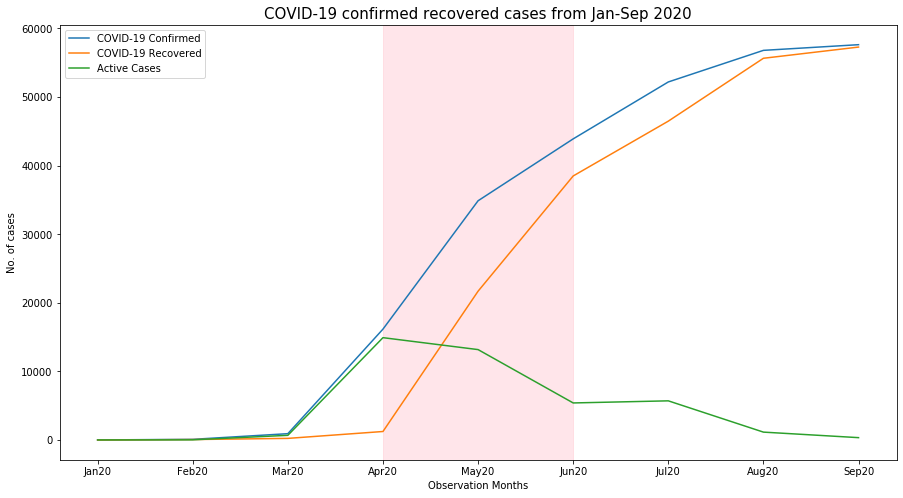

In [84]:
ax_covid_active = df_covid_fil.plot(figsize=(15,8),legend=True, fontsize=10) #plotting line graph
plt.ylabel('No. of cases') #set y-axis label
plt.xlabel('Observation Months') #set x-axis label 
plt.xticks(np.arange(9),('Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20')) #set x-axis names
plt.title('COVID-19 confirmed recovered cases from Jan-Sep 2020', fontsize=15) #set title
plt.axvspan(3, 5, color='pink', alpha=0.4) #highlights circuit breaker months in blue for visualisation
#plt.axvspan(0, 8, color='green', alpha=0.1) 
plt.show()


#highlited in red is during the months of Circuit Breaker Period

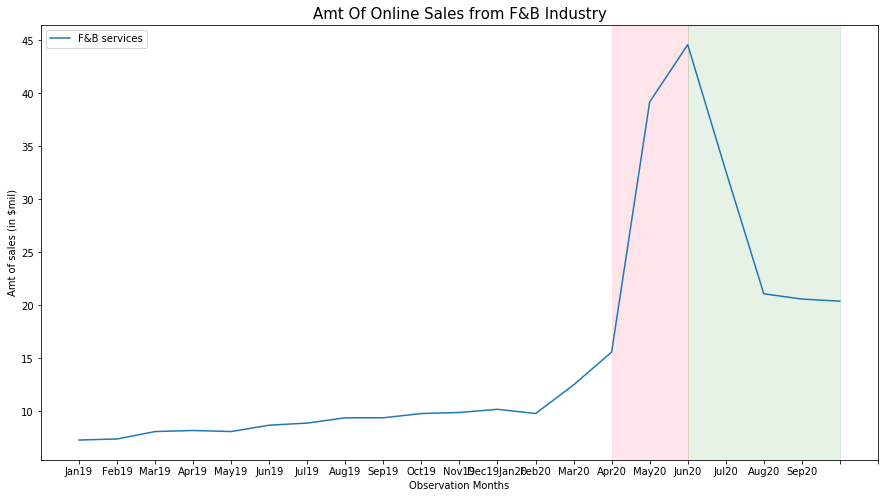

In [85]:
ax_online = df_online_sales.plot(figsize=(15,8),legend=True, fontsize=10) #plotting line graph
plt.ylabel('Amt of sales (in $mil)') #set y-axis label
plt.xlabel('Observation Months') #set x-axis label 

#set x-axis names
plt.xticks(np.arange(23),('Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19', 'Oct19', 'Nov19', 'Dec19'
                        'Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20'))
plt.title('Amt Of Online Sales from F&B Industry', fontsize=15) #set title
plt.axvspan(14, 16, color='pink', alpha=0.4) #highlights circuit breaker months in blue for visualisation
plt.axvspan(16, 20, color='green', alpha=0.1) 
plt.show()


#highlited in red is during the months of Circuit Breaker Period
#highlighted in green is dueing post circuit breaker months (Phase1 and 2)

- Amt of online sales shot up during circuit breaker months
- Also highly correlated with covid-19 cases in the year 2020 Jan - Sep
- This could mean that the low negative correlation between covid-19 and value of F&B sales is due to the cushioning effect and strong F&B sales from online proportion
- this could be due to CB measures as most of singaporeans are locked at ome or working from home annd thus not going out for dining due to restrictions
- Even for post CB period, demmand from online sales is sales is still storng (higher than pre-covid levels 2019 Jan - 2020 Jan)